## Import Tensorflow and mnist

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.datasets import mnist
import pickle

# Import train images and test images

In [7]:
(train_images, train_labels), (test_images, test_data) = mnist.load_data()
input_size = train_images.shape[1]* train_images.shape[2]
train_size = train_images.shape[0]
test_size = test_images.shape[0]

In [8]:
train_size

60000

## IMport Keras

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a model

In [10]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation = "softmax")
])

# Compile model

In [11]:
model.compile(optimizer= "rmsprop" ,
              loss= "sparse_categorical_crossentropy" ,
              metrics= "accuracy")

In [12]:
train_images = train_images.reshape(train_size, input_size)
train_images = train_images.astype("float32") /255
test_images = test_images.reshape(test_size, input_size)
test_images = test_images.astype("float32") /255


In [13]:
train_images.shape

(60000, 784)

In [14]:
model.fit(train_images, train_labels, epochs= 30 , batch_size= 64)

Epoch 1/30
938/938 [==============================] - 6s 5ms/step - loss: 0.3063 - accuracy: 0.9141
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.1484 - accuracy: 0.9569
Epoch 3/30
938/938 [==============================] - 6s 7ms/step - loss: 0.1068 - accuracy: 0.9685
Epoch 4/30
938/938 [==============================] - 7s 7ms/step - loss: 0.0840 - accuracy: 0.9750
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0689 - accuracy: 0.9798
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0584 - accuracy: 0.9829
Epoch 7/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0508 - accuracy: 0.9854
Epoch 8/30
938/938 [==============================] - 4s 5ms/step - loss: 0.0436 - accuracy: 0.9876
Epoch 9/30
938/938 [==============================] - 4s 5ms/step - loss: 0.0377 - accuracy: 0.9890
Epoch 10/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0337 - accuracy: 0.9908

In [15]:
model.save("shrikant_mnist_nn_model.keras")

In [16]:
test_digits = test_images[500:510]
load_model = keras.models.load_model("shrikant_mnist_nn_model.keras")
predictions = load_model.predict(test_digits)

1/1 [==============================] - 0s 80ms/step


In [17]:
predictions

array([[3.4403152e-34, 3.6696839e-31, 2.8755191e-21, 1.0000000e+00,
        2.0942852e-37, 9.6568096e-20, 0.0000000e+00, 1.2890368e-29,
        6.8510866e-24, 1.4447124e-19],
       [1.0221968e-14, 8.6095623e-31, 8.5817609e-15, 5.5742552e-15,
        2.0919712e-13, 1.6316487e-20, 1.2787638e-18, 1.7834913e-12,
        1.7544036e-17, 1.0000000e+00],
       [1.0306455e-15, 8.8185468e-14, 2.9104105e-15, 3.7933478e-07,
        2.0824286e-16, 9.9999964e-01, 1.1193309e-16, 1.4464692e-14,
        9.1497209e-12, 1.3538116e-09],
       [7.7207558e-20, 2.2925101e-22, 1.0000000e+00, 2.5238462e-17,
        1.7816784e-24, 4.1702688e-26, 3.2972325e-25, 3.4972843e-24,
        7.8451788e-21, 6.6479450e-27],
       [1.1872581e-11, 9.9978858e-01, 2.4746687e-09, 2.0616909e-07,
        5.5103492e-06, 9.5744124e-12, 2.6016249e-09, 2.0359809e-04,
        3.3911371e-07, 1.7474041e-06],
       [4.1478469e-28, 2.9257688e-18, 5.8322390e-15, 1.0000000e+00,
        1.8168035e-33, 1.0872758e-15, 5.9596670e-31, 7.92

500th number in the test is predicted as 3


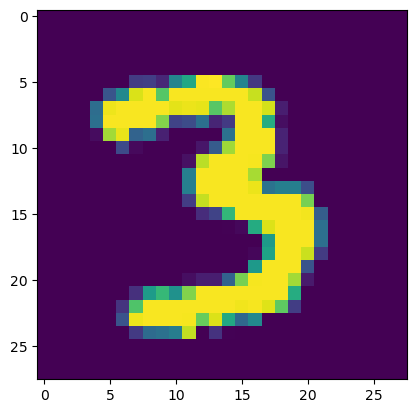

In [18]:
import matplotlib.pyplot as plt

img = test_images[500].reshape(28,28)
img.shape
plt.imshow(img)
predicated_digit = predictions[0].argmax()
print(f"500th number in the test is predicted as {predicated_digit}")



1/1 [==============================] - 0s 44ms/step


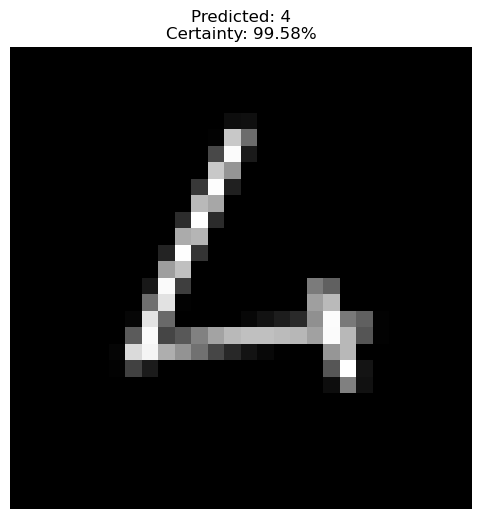

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import sys


def load_images(file_path):
        images = Image.open(file_path)
        #images.show()
        images = images.resize((28, 28))
        grey_img = images.convert("L")
        img_array = np.array(grey_img)
        img_array = img_array.reshape(1, 28*28)
        return img_array/255.0


img_size = 28*28
model_path = 'shrikant_mnist_nn_model.keras'
img_path = 'images/4_1.png'

load_model = keras.models.load_model(model_path)

predictions  = load_model.predict(load_images(img_path))



predicated_digit = predictions.argmax()

p_hat = np.argmax(predictions)
p_certainty = predictions[0][predicated_digit]
#prediction_certainity = 

plt.figure(figsize=(6, 6))
plt.title(f"Predicted: {predicated_digit}\nCertainty: {p_certainty*100:.2f}%")
plt.axis('off')
plt.imshow(load_images(img_path).reshape(28, 28), cmap='gray')
plt.show()



1/1 [==============================] - 0s 22ms/step


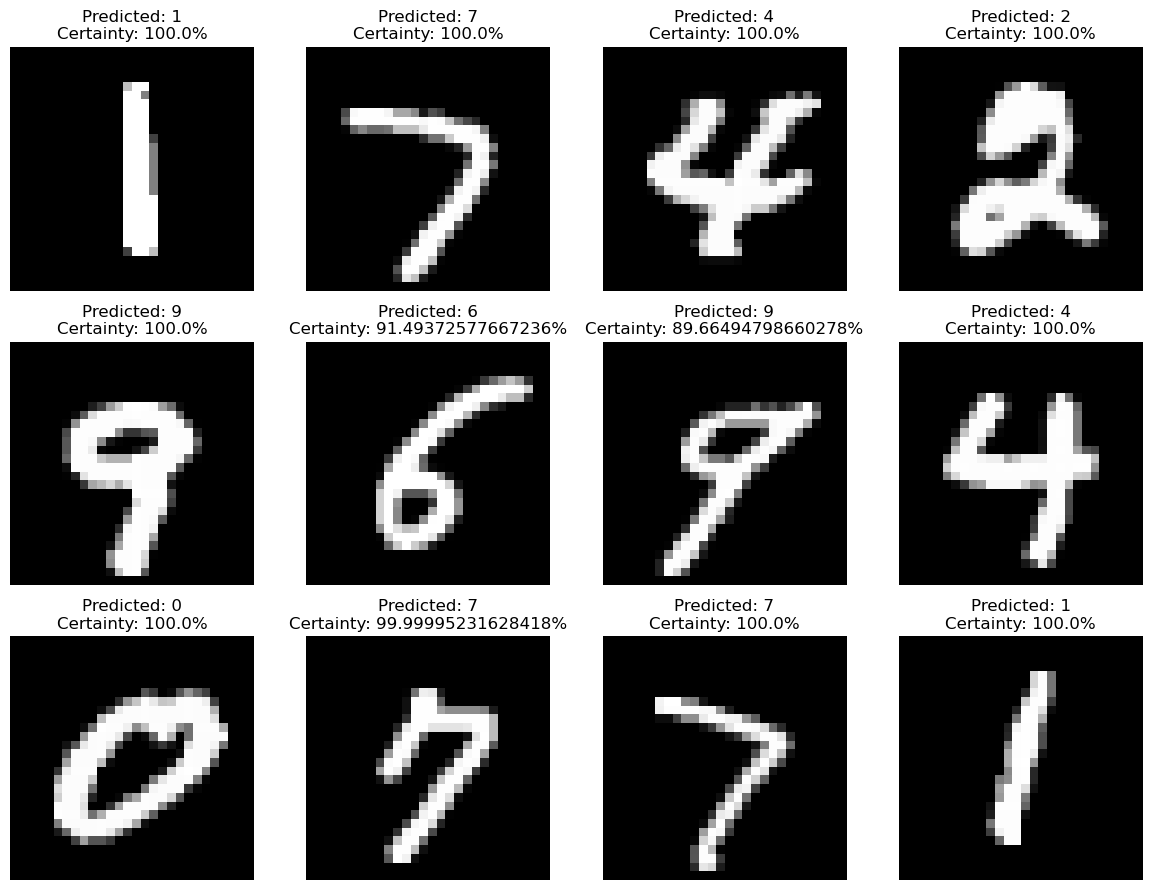

In [40]:

# Load the MNIST dataset
(_, _), (test_images, test_labels) = mnist.load_data()


load_model = keras.models.load_model("shrikant_mnist_nn_model.keras")

# make a figure and axes
fig, axs = plt.subplots(3, 4, figsize=(12, 9))

for i in range(12):
    
    random_index = np.random.randint(0, test_images.shape[0])
    
    
    image = Image.fromarray(test_images[random_index])
    image = image.resize((28, 28))
    grey_img = image.convert("L")
    img_array = np.array(grey_img)
    img_array = img_array.reshape(1, 28*28) / 255.0

    axs[i // 4, i % 4].imshow(img_array.reshape(28, 28), cmap='gray')
    axs[i // 4, i % 4].axis('off')
    
    prediction = load_model.predict(img_array)
    predicated_digit = prediction.argmax()
    certainty = prediction[0][predicated_digit]
    
    axs[i // 4, i % 4].set_title(f"Predicted: {predicated_digit}\nCertainty: {certainty*100}%")

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 18ms/step


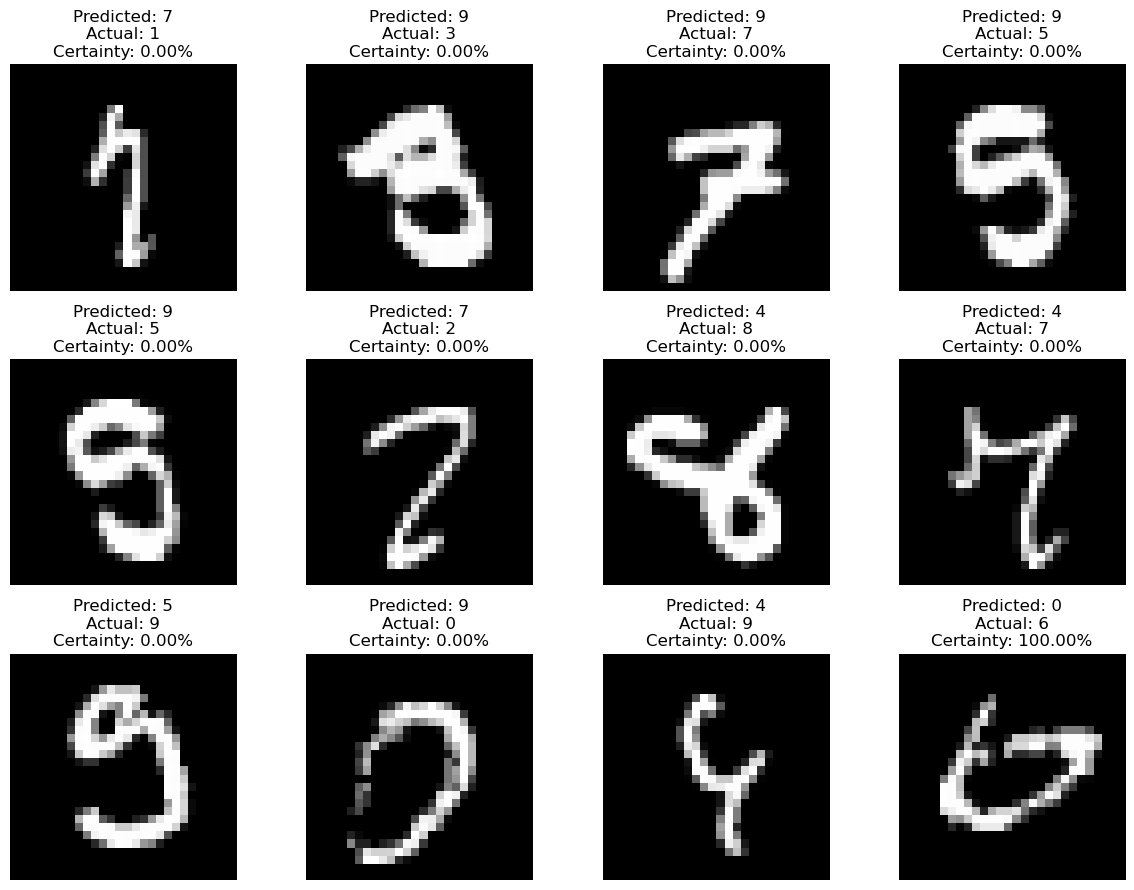

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from PIL import Image
from sklearn.utils import shuffle

# Load the MNIST dataset
(_, _), (test_images, test_labels) = mnist.load_data()

# Load the pre-trained model
load_model = keras.models.load_model("shrikant_mnist_nn_model.keras")

fig, axs = plt.subplots(3, 4, figsize=(12, 9))

# make a list to store unsuccessful images
unsuccessful_images = []

# Shuffle the test set to get random order
test_images, test_labels = shuffle(test_images, test_labels)


for img, label in zip(test_images, test_labels):
    img = Image.fromarray(img)
    img = img.resize((28, 28))
    grey_img = img.convert("L")
    img_array = np.array(grey_img)
    img_array = img_array.reshape(1, 28*28) / 255.0

    # Make a prediction for the current image
    prediction = load_model.predict(img_array)
    predicated_digit = prediction.argmax()

    # Check if the prediction is unsuccessful (i.e., incorrect)
    if predicated_digit != label:
        unsuccessful_images.append((img_array, predicated_digit, label))

    #  we need to find 12 unsuccessful images first
    if len(unsuccessful_images) == 12:
        break

# Now show those 12 predictions which were unsuccesful
for i, (img_array, predicated_digit, label) in enumerate(unsuccessful_images):
    axs[i // 4, i % 4].imshow(img_array.reshape(28, 28), cmap='gray')
    axs[i // 4, i % 4].axis('off')
    certainty = prediction[0][predicated_digit]
    axs[i // 4, i % 4].set_title(f"Predicted: {predicated_digit}\nActual: {label}\nCertainty: {certainty*100:.2f}%")

plt.tight_layout()
plt.show()
